[[[ 0.34171441 -0.44644356 -1.29905605 ..., -5.98507881 -6.56855917
   -6.93130255]
  [ 0.62735701 -0.20263827 -1.04816473 ..., -7.18176413 -7.3414669
   -7.31747007]
  [ 0.51034725 -0.38194737 -1.05690897 ..., -7.7611146  -7.61408329
   -7.40999174]
  ..., 
  [-0.22379163 -0.40828568 -0.49820995 ..., -2.37095833 -2.30453777
   -2.5118475 ]
  [-0.20937768 -0.27085122 -0.28166771 ..., -2.01830554 -2.02161694
   -2.16005421]
  [-0.14057823 -0.10798287 -0.06372952 ..., -1.68471158 -1.75092208
   -1.83465683]]]
<class 'netCDF4._netCDF4.Variable'>
float32 WS10(Time, south_north, west_east)
    units: m h-1
    long_name: 10 meter windspeed
unlimited dimensions: 
current shape = (1, 69, 97)
filling on, default _FillValue of 9.969209968386869e+36 used



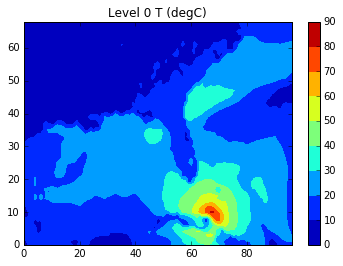

In [17]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import os

#Original netCDF file path
WRFOUT_FILEPATH = 'wrfout_d01_2017-09-09_12:00:00'

#New netCDF file path
WRFDIAG_FILEPATH = 'newfileassignment.nc'

def create_wind_dignostics(wrfout_filepath=None, wrfdiag_filepath=None):
    
    orig_dataset = netCDF4.Dataset(wrfout_filepath, 'r')
    
    #if newfile already exits, remove it to avoid potential
    #permission problems
    if os.path.isfile(wrfdiag_filepath):
        os.remove(wrfdiag_filepath)
    diag_dataset = netCDF4.Dataset(wrfdiag_filepath, 'w', clobber=True)
    
    #write the same dimensions to the diagnostic dataset
    for the_key in orig_dataset.dimensions.keys():
        the_value = orig_dataset.dimensions[the_key].size
        the_name = orig_dataset.dimensions[the_key].name
        diag_dataset.createDimension(the_name, the_value)
        
    # Create the new variable WS10 (miles/hour) for U10 & V10 (m/sec)
    # Let's get U10 & V0
    U10 = orig_dataset.variables['U10'][:]
    V10 = orig_dataset.variables['V10'][:]
    
    
    #Create WS10
    WS10 = (np.sqrt(U10**2 + V10**2)) 
    # * 2.236 #units are in miles/hour
    
    # Write it, along with attributes, to the diagnostic field
    ws10 = diag_dataset.createVariable('WS10', np.float32,
                                       ('Time', 'south_north',
                                        'west_east'))
    ws10.units = "m h-1"
    ws10.long_name = "10 meter windspeed"
    ws10[:] = WS10
        

#     plt.contourf(ws10[0,:,:])
#     plt.title("Level 0 T (degC)")
#     plt.colorbar()
#     plt.show()
    
create_wind_dignostics(WRFOUT_FILEPATH, WRFDIAG_FILEPATH)
    